In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

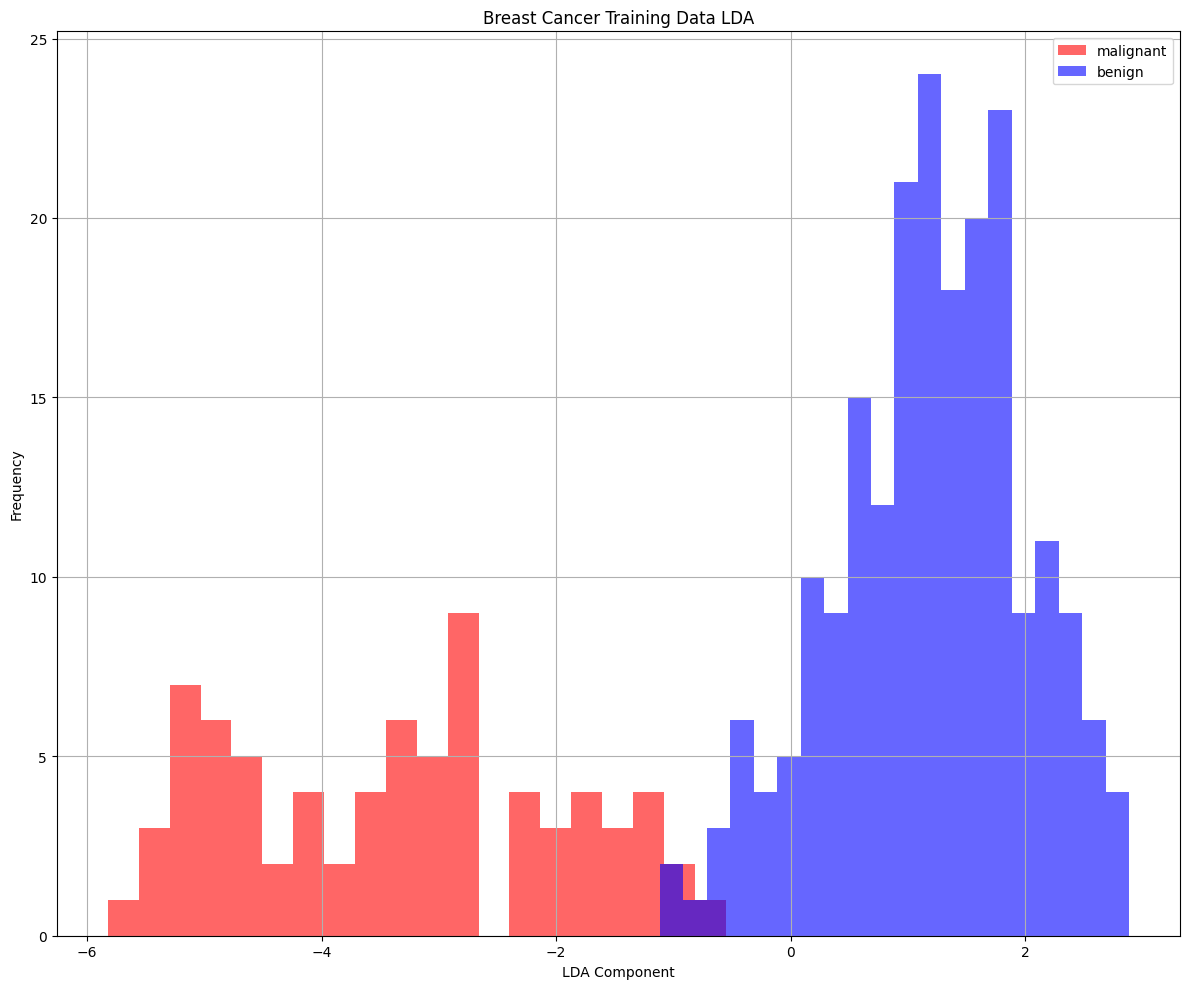

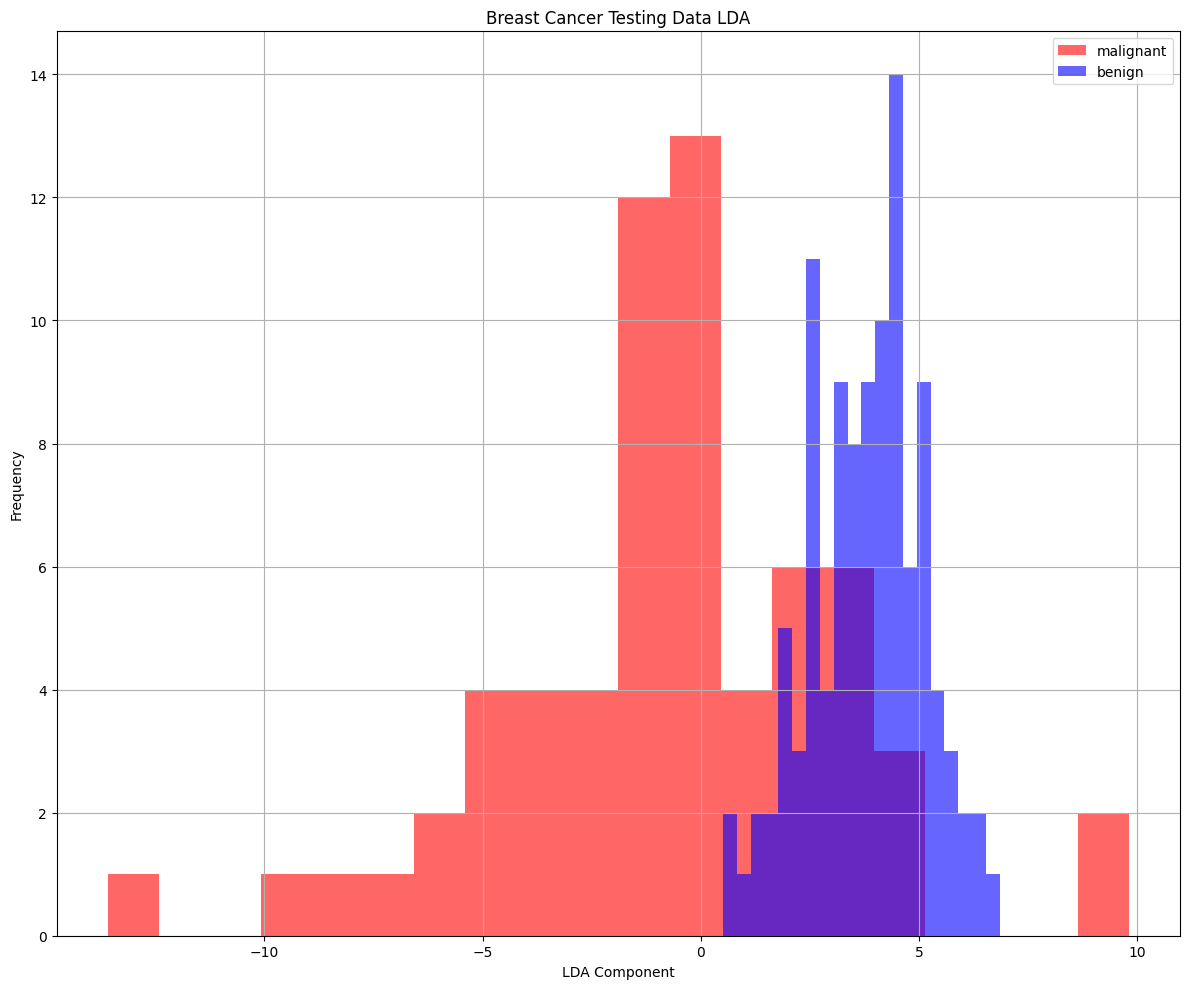

[I 2025-04-27 10:03:17,453] A new study created in memory with name: no-name-a81767d7-7e4f-4e6b-8cb9-2a25040837bb
[I 2025-04-27 10:03:21,347] Trial 0 finished with value: 0.9790078644888082 and parameters: {'n_estimators': 451, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9790078644888082.
[I 2025-04-27 10:03:25,561] Trial 1 finished with value: 0.9825771324863884 and parameters: {'n_estimators': 543, 'max_depth': 19, 'min_samples_split': 18, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.9825771324863884.
[I 2025-04-27 10:03:33,454] Trial 2 finished with value: 0.9824561403508772 and parameters: {'n_estimators': 999, 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.9825771324863884.
[I 2025-04-27 10:03:39,538] Trial 3 finished with value: 0.9791893526920751 and parameters: {'n_estimators': 805, 'max_depth': 22, 'min_samples_split': 13, 'min_samples_leaf': 20}. Best is trial 1 with v

Best trial:
Accuracy: 0.9861464004839686
Best hyperparameters:  {'n_estimators': 308, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 6}


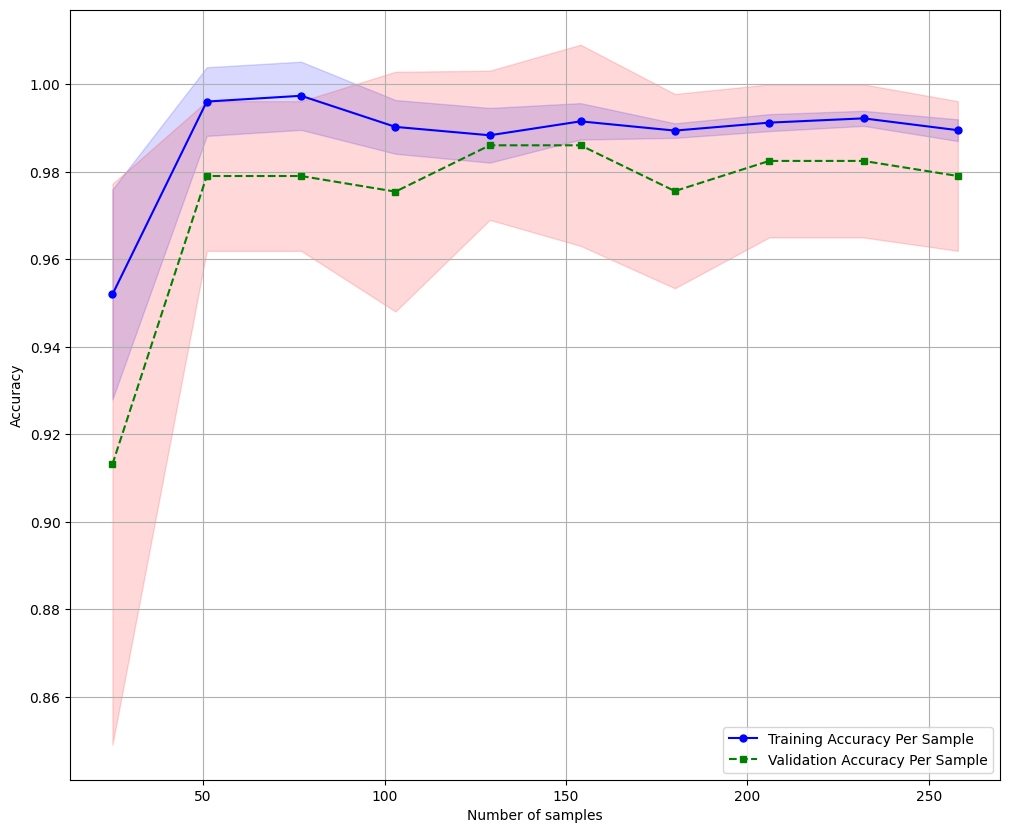

Confusion Matrix
[[ 28  36]
 [  0 107]]
Accuracy: 0.7895, Precision: 0.7483, Recall: 1.0000, F1: 0.8560, AUC: 0.7578


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)